In [ ]:
pass

## Imports

In [1]:
import statsmodels.tools as smt
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pixiedust
%matplotlib inline

Pixiedust database opened successfully


## Functions

In [11]:
def corr_heatmap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    # Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", vmin = -1, vmax = 1)
    # Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    # Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    # show plot
    plt.show()
    
def residual_plot(OLSmodel):
    sns.residplot(OLSmodel.resid.index.values, OLSmodel.resid, lowess=True, color="g")
    plt.show()
    
def plotResiduals(OLSmodel):
    plt.scatter(OLSmodel.predict(),OLSmodel.resid)
    plt.show()
    
def residual_normality_test(OLSmodel):
    pass
    #residuals = OLSmodel.resid
    #predicted = OLSmodel.fittedvalues
    #resid_predict = pd.concat([pd.Series(residuals, name='resid'),pd.Series(predicted,name='redicted')], axis=1)
    #sns.residplot(residuals,predicted)
    #sns.set(color_codes=True)
    #sns.distplot(dataframe.resid,kde=False,fit=stats.)
    #plt.show()
    #sns.kdeplot(dataframe.resid)
    #plt.show()
    #sns.distplot(df.resid, kde=False, fit=stats.norm)
    #plt.show()
    #sm.qqpblot(dataframe.resid)
    #plt.show()
    #print(stats.normaltest(dataframe.resid))

def scale_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df)
    df_normalized = pd.DataFrame(np_scaled)
    return df_normalized

## Read and Prepare Data

In [12]:
data_path_mberg = 'C:\\Users\\mberg\\PycharmProjects\\HousePrices\\'
data_path_I867150 = 'todo'

train_data_file_name = 'kc_house_data_train.csv'
test_data_file_name = 'kc_house_data_test.csv'

#df = pd.read_csv(data_path_I867150 + train_data_file_name)
df_train_raw = pd.read_csv(data_path_mberg + train_data_file_name, index_col=0)

#df_train = scale_data(df_train_raw)
df_train = df_train_raw

df_train.drop(['id','lat','long'],axis=1, inplace=True)
df_train_tmp = df_train.drop(['price'],axis = 1)

## Explore Data

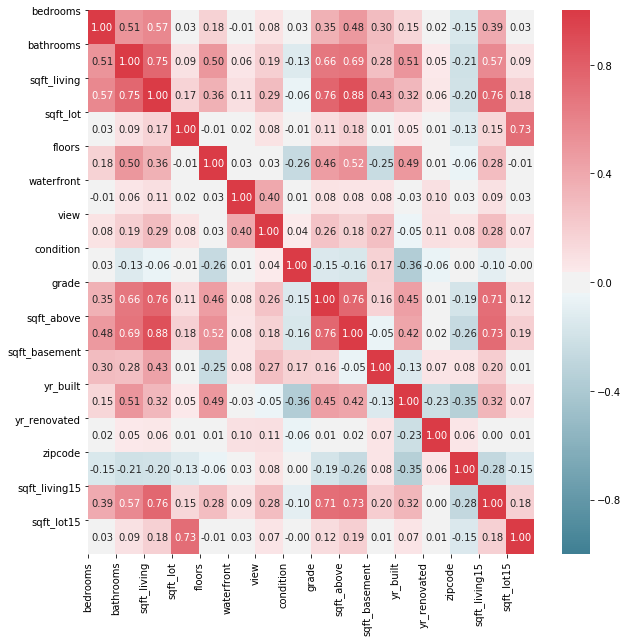

In [13]:
corr_heatmap(df_train_tmp)
# distribution of each variable
# outliers
# interaction plots


## Fit OLS Model

In [14]:
reg_model = smf.ols('price~sqft_living+C(waterfront)+sqft_living*C(waterfront)+view+C(grade)+C(yr_built)+C(grade)*C(yr_built)+C(zipcode)+C(zipcode)*sqft_living', data=df_train).fit()

## Model Summary and Residual Plot

C:\Users\mberg\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\mberg\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\mberg\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\mberg\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     208.0
Date:                Sun, 13 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:13:42   Log-Likelihood:            -2.5391e+05
No. Observations:               19451   AIC:                         5.096e+05
Df Residuals:                   18581   BIC:                         5.164e+05
Df Model:                         869                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

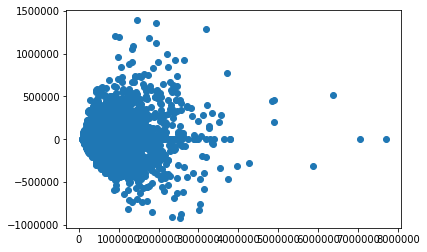

In [15]:
print(reg_model.summary())
df_train_plus_resid = pd.concat([df_train, pd.Series(reg_model.resid, name = 'resid')], axis = 1)
plotResiduals(reg_model)

## Test for Normal Distribution

In [ ]:
residual_normality_test(reg_model)



## Test for Heteroscedasdicity

## Test for Autocorrelation

## Predict Test Set and Calculate Error

In [ ]:
df_test = pd.read_csv(data_path_mberg + test_data_file_name)
pred = reg_model.predict(df_test)
act = df_test['price']
RMSE = smt.eval_measures.rmse(pred, act, axis=0)
print (RMSE)